<a href="https://colab.research.google.com/github/arpit0020/hotel-review/blob/main/hotel_review_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploded = files.upload()

Saving hotel_reviews (2) (1).xlsx to hotel_reviews (2) (1).xlsx


In [ ]:
df = pd.read_excel("hotel_reviews (2) (1).xlsx")

In [ ]:
df.head()

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN


In [ ]:
df.isnull().sum()

,0
Review,0
Rating,0
@,20491


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  int64  
 2   @       0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.4+ KB


In [ ]:
df.describe()

,Rating,@
count,20491.000000,0.0
mean,3.952223,NaN
std,1.233030,NaN
min,1.000000,NaN
25%,3.000000,NaN
50%,4.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


In [ ]:
df.shape

(20491, 3)

In [ ]:
df = df.drop(columns=['@'])

In [ ]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
df["Rating"].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


<Axes: >

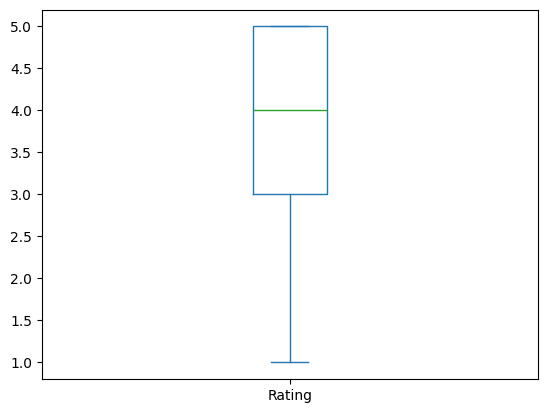

In [ ]:
df.plot(kind = "box")

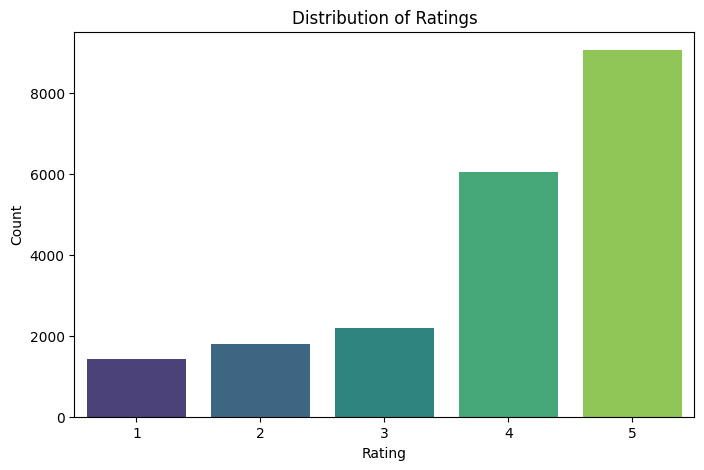

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Rating"], palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
avg_Rating = df['Rating'].mean()
positive_Rating = len(df[df['Rating'] >= 4]) / len(df) * 100
neutral_Rating= len(df[(df['Rating'] > 2) & (df['Rating'] < 4)]) / len(df) * 100
negative_Rating = len(df[df['Rating'] <= 2]) / len(df) * 100


print("\nKey Insights:")
print(f"1. Average Rating: {avg_Rating:.2f}/5")
print(f"2. Positive Rating (4-5 stars): {positive_Rating:.1f}%")
print(f"3. neutral_Rating (Rating>2 & Rating< 4 ): {neutral_Rating :.1f}%")
print(f"4. Negative_Rating (1-2 stars): {negative_Rating:.1f}%")


Key Insights:
1. Average Rating: 3.95/5
2. Positive Rating (4-5 stars): 73.7%
3. neutral_Rating (Rating>2 & Rating< 4 ): 10.7%
4. Negative_Rating (1-2 stars): 15.7%


In [ ]:
df['char_count'] = df['Review'].apply(len)

In [ ]:
df

,Review,Rating,char_count
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733
20487,great location price view hotel great quick pl...,4,306
20488,"ok just looks nice modern outside, desk staff ...",2,443
20489,hotel theft ruined vacation hotel opened sept ...,1,5557


In [ ]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
df

,Review,Rating,char_count,word_count
0,nice hotel expensive parking got good deal sta...,4,593,87
1,ok nothing special charge diamond member hilto...,2,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,600,89
4,"great stay great stay, went seahawk game aweso...",5,1281,191
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,109
20487,great location price view hotel great quick pl...,4,306,39
20488,"ok just looks nice modern outside, desk staff ...",2,443,63
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,781


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

# Now you can use sent_tokenize
df['sent_count'] = df['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df

,Review,Rating,char_count,word_count,sent_count
0,nice hotel expensive parking got good deal sta...,4,593,87,1
1,ok nothing special charge diamond member hilto...,2,1689,250,1
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,2
3,"unique, great stay, wonderful time hotel monac...",5,600,89,1
4,"great stay great stay, went seahawk game aweso...",5,1281,191,1
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,733,109,1
20487,great location price view hotel great quick pl...,4,306,39,1
20488,"ok just looks nice modern outside, desk staff ...",2,443,63,1
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,781,1


In [ ]:
df[df['Rating']==4]['char_count'].mean()

np.float64(745.6886901804935)

In [ ]:
df[df['Rating']==1]['char_count'].mean()

np.float64(769.9401829697396)

In [ ]:
import re

In [ ]:
df['Review'][1]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

In [ ]:
review =re.sub('[^a-zA-Z]',' ',df['Review'][1])

In [ ]:
review

'ok nothing special charge diamond member hilton decided chain shot   th anniversary seattle  start booked suite paid extra website description not  suite bedroom bathroom standard hotel room  took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast  got kidding  embassy suits sitting room bathroom bedroom unlike kimpton calls suite    day stay offer correct false advertising  send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution  send email trip guest survey did not follow email mail  guess tell concerned guest the staff ranged indifferent not helpful  asked desk good breakfast spots neighborhood hood told no hotels  gee best breakfast spots seattle     block away convenient hotel does not know exist  arrived late night    pm inside run bellman bu

In [ ]:
review = review.lower()

In [ ]:
review

'ok nothing special charge diamond member hilton decided chain shot   th anniversary seattle  start booked suite paid extra website description not  suite bedroom bathroom standard hotel room  took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast  got kidding  embassy suits sitting room bathroom bedroom unlike kimpton calls suite    day stay offer correct false advertising  send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution  send email trip guest survey did not follow email mail  guess tell concerned guest the staff ranged indifferent not helpful  asked desk good breakfast spots neighborhood hood told no hotels  gee best breakfast spots seattle     block away convenient hotel does not know exist  arrived late night    pm inside run bellman bu

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(all_stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
#review_string = " ".join(review) # Convert the list 'review' back to a string
review = [word for word in review if word not in set(all_stopwords)] # Apply split() on the string

In [ ]:
 print(review)


peopl talk ca n t believ excel rate hotel just n t ye patricia extrem help fluent languag goe way make welcom said place bit dump inexpens hotel expens citi place bit date institut odor charm funer home walk step hotel girlfriend step condom ye condom step lot guy hang desk hallway girlfriend swear hous prostitut patricia did arrang taxi follow morn stay night did wrong inform cost fare room clean larg bathroom small passabl night glad leav follow morn not recommend extend stay unless tight budget n t care look feel place


In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps=PorterStemmer()

In [ ]:
review = [ps.stem(word) for word in review]

In [ ]:
review = " ".join(review)

In [ ]:
review

'k   n h n g   p e c l   c h r g e   n   e b e r   h l n   e c e   c h n   h       h   n n v e r r   e l e     r   b k e   u e   p   e x r   w e b e   e c r p n   n     u e   b e r   b h r   n r   h e l   r     k   p r n e   r e e r v n   e k   h w e     h n g   l k e   v   c u c h   e c   e k   c l e r k   l   h   x e   u e   e c r p n   k p n   w e b e   r r   f r e e   b r e k f     g   k n g     e b   u   n g   r   b h r   b e r   u n l k e   k p n   c l l   u e             f f e r   c r r e c   f l e   v e r n g     e n   k p n   p r e f e r r e   g u e   w e b e   e l   k n g   f l u r e   p r v e   u e   v e r e   w e b e   r e e r v n   e c r p n   f u r n h e   h r   c p   r e e r v n   p r n u   w e b e   e k   n g e r   u     n   r e p l   l u n     e n   e l   r p   g u e   u r v e     n   f l l w   e l   l     g u e   e l l   c n c e r n e   g u e   h e   f f   r n g e   n f f e r e n   n   h e l p f u l     k e   e k   g   b r e k f   p   n e g h b r h   h   l   n   h e l

In [ ]:
import re
custom_stopwords={ 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she'd", "she'll", "she's", 'should', 'shouldn', "shouldn't", "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', "we'd", "we'll", "we're", 'were', 'weren', "weren't", "we've", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've"}
corpus = []
ps=PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords
for i in range(0,len(df)):
   review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
   review = review.lower()
   review = review.split()
   review = [ps.stem(word) for word in review if word not in set(stop_words)]
   review = " ".join(review)
   corpus.append(review)

In [ ]:
df['processed_review'] = corpus

In [ ]:
df.head()

,Review,Rating,char_count,word_count,sent_count,processed_review
0,nice hotel expensive parking got good deal sta...,4,593,87,1,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,1689,250,1,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,2,nice room not experi hotel monaco seattl good ...
3,"unique, great stay, wonderful time hotel monac...",5,600,89,1,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,1281,191,1,great stay great stay went seahawk game awesom...


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width = 500 , height = 500,min_font_size=8,background_color='white')

In [ ]:
pos = wc.generate(df[df['Rating'] == 2]['processed_review'].str.cat(sep=" "))

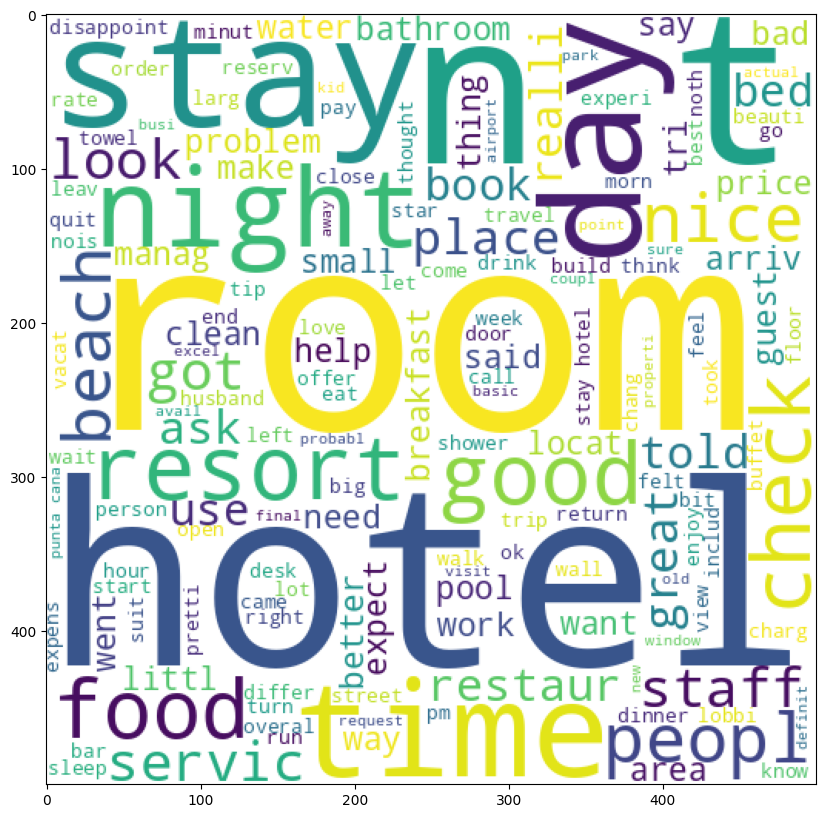

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(pos)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=1500)

In [ ]:
df["Sentiment"] = np.where(df["Rating"] >= 4, "Positive", "Negative")

In [ ]:
df.head()


,Review,Rating,char_count,word_count,sent_count,processed_review,Sentiment
0,nice hotel expensive parking got good deal sta...,4,593,87,1,nice hotel expens park got good deal stay hote...,Positive
1,ok nothing special charge diamond member hilto...,2,1689,250,1,ok noth special charg diamond member hilton de...,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,1427,217,2,nice room not experi hotel monaco seattl good ...,Negative
3,"unique, great stay, wonderful time hotel monac...",5,600,89,1,uniqu great stay wonder time hotel monaco loca...,Positive
4,"great stay great stay, went seahawk game aweso...",5,1281,191,1,great stay great stay went seahawk game awesom...,Positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words

# Transform text data to TF-IDF features
X = vectorizer.fit_transform(df['Review'])

# Convert Sentiment to numeric labels (0 = Negative, 1 = Positive)
y = np.where(df["Sentiment"] == "Positive", 1, 0)

# Check shape
print(f"Feature matrix shape: {X.shape}")




Feature matrix shape: (20491, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(df.columns)

Index(['Review', 'Rating', 'char_count', 'word_count', 'sent_count',
       'processed_review', 'Sentiment'],
      dtype='object')


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16392, 5000), (16392,), (4099, 5000), (4099,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.68%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model3.predict(X_test)

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 87.12%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model4.predict(X_test)

In [ ]:
#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 82.51%


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Convert sparse matrix to dense (GaussianNB requires dense input)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize and train Gaussian Naive Bayes model
model5 = GaussianNB()
model5.fit(X_train_dense, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = model5.predict(X_test_dense)

In [ ]:
#Calculate accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f" model Accuracy: {accuracy_gnb * 100:.2f}%")

 model Accuracy: 79.68%


In [ ]:
import pickle
pickle.dump(model2,open('lr_model2.pkl','wb'))
pickle.dump(df, open('dataset.pkl','wb'))

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# ... (Your existing code) ...

def predict_rating(review_text):
    # Preprocess the input review
    review = re.sub('[^a-zA-Z]', ' ', review_text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stop_words)]
    review = " ".join(review)

    # Vectorize the review
    review_vector = cv.transform([review]).toarray()

    # Predict the rating using the logistic regression model (you can change this to GaussianNB if needed)
    predicted_rating = lr.predict(review_vector)[0]

    if predicted_rating >=4 :
        result = "Good Hotel"
    elif predicted_rating >2 and predicted_rating < 4:
        result = "Neutral"
    else:
      result = "Bad Hotel"

    return predicted_rating, result


# Create input widgets
review_input = widgets.Textarea(
    placeholder='Enter your hotel review here',
    description='Review:',
    layout=widgets.Layout(width='500px', height='100px')
)

predict_button = widgets.Button(description='Predict Rating')
output = widgets.Output()


def on_button_clicked(b):
    with output:
        clear_output()  # Clear previous output
        review = review_input.value
        if review:
            predicted_rating, result = predict_rating(review)
            print(f"Predicted Rating: {predicted_rating}")
            print(f"Result: {result}")
        else:
            print("Please enter a review.")

predict_button.on_click(on_button_clicked)


# Display the widgets
display(review_input, predict_button, output)


Textarea(value='', description='Review:', layout=Layout(height='100px', width='500px'), placeholder='Enter you…

Button(description='Predict Rating', style=ButtonStyle())

Output()